In [1]:
! git clone https://github.com/Nelson-Gon/cytounet.git

Cloning into 'cytounet'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 1249 (delta 33), reused 164 (delta 15), pack-reused 1064
Receiving objects: 100% (1249/1249), 100.64 MiB | 27.81 MiB/s, done.
Resolving deltas: 100% (535/535), done.


In [2]:
%cd cytounet 

/kaggle/working/cytounet


In [3]:
from cytounet.model import *
from cytounet.augmentation import *
from cytounet.data import * 

Using TensorFlow backend.


In [4]:
x_train = read_images("examples/BBBC030_v1/train/images", image_suffix="png")
y_train = read_images("examples/BBBC030_v1/train/outlines", image_suffix="png")

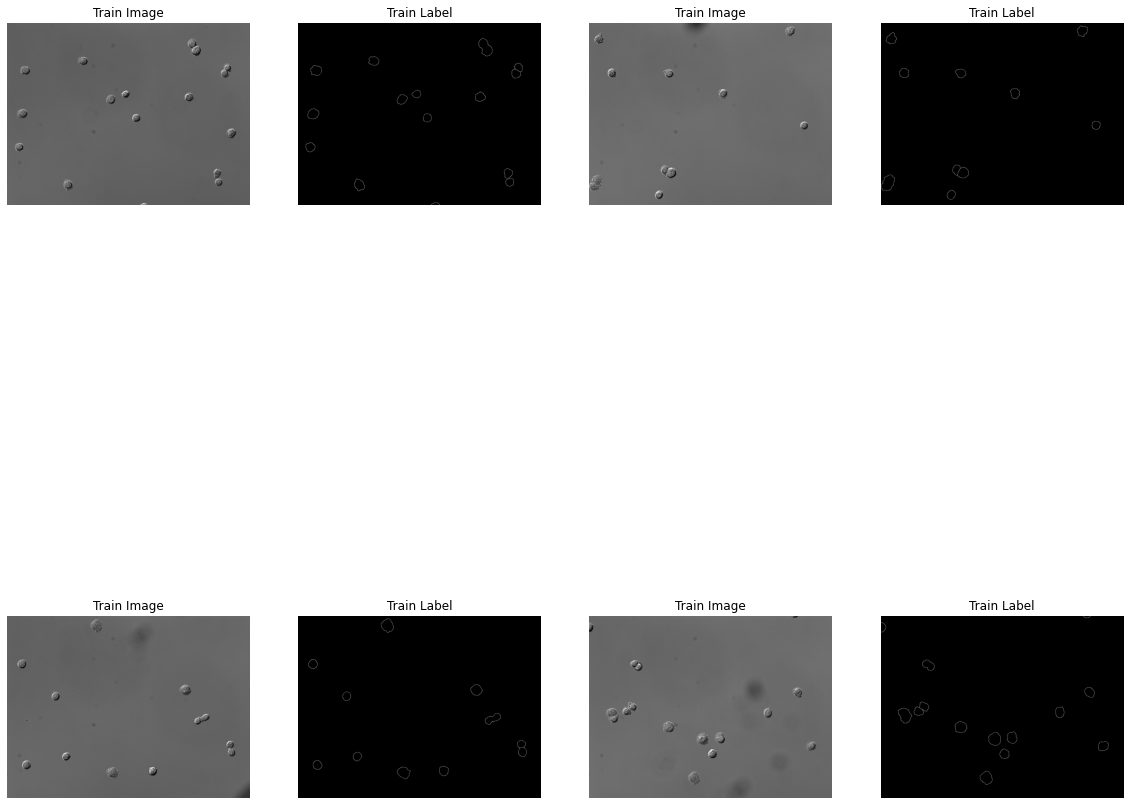

In [5]:
show_images(x_train, y_train, titles=['Train Image', 'Train Label'], number = 4)

In [6]:
data_gen_args = dict(rotation_range=0.1,
                      rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.05,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest') 

In [7]:
# augmentation will take up a lot of space, only use if you have enough space on disk
#! if [ ! -d "aug" ]; then mkdir aug aug/images aug/masks;fi

In [8]:
my_generator = generate_train_data(4,'examples/BBBC030_v1/train','images','outlines',
                                   data_gen_args,save_to_dir = None, seed= 2,
                              target_size = (256, 256))

In [9]:
model = unet(input_size = (256, 256, 1), optimiser='Adam', learning_rate=1e-4, 
             metrics=[dice_coef], loss=dice_coef_loss, regularizer='l2')

In [10]:
history = train(model, my_generator, epochs = 25, steps_per_epoch= 100,verbose=1) 

Epoch 1/25
Found 22 images belonging to 1 classes.
Found 22 images belonging to 1 classes.
['images/cho01.png', 'images/cho02.png', 'images/cho03.png', 'images/cho04.png', 'images/cho05.png', 'images/cho06.png', 'images/cho07.png', 'images/cho08.png', 'images/cho09.png', 'images/cho10.png', 'images/cho11.png', 'images/cho12.png', 'images/cho13.png', 'images/cho14.png', 'images/cho15.png', 'images/cho16.png', 'images/cho17.png', 'images/cho18.png', 'images/cho19.png', 'images/cho20.png', 'images/cho21.png', 'images/cho22.png']
['outlines/cho01.png', 'outlines/cho02.png', 'outlines/cho03.png', 'outlines/cho04.png', 'outlines/cho05.png', 'outlines/cho06.png', 'outlines/cho07.png', 'outlines/cho08.png', 'outlines/cho09.png', 'outlines/cho10.png', 'outlines/cho11.png', 'outlines/cho12.png', 'outlines/cho13.png', 'outlines/cho14.png', 'outlines/cho15.png', 'outlines/cho16.png', 'outlines/cho17.png', 'outlines/cho18.png', 'outlines/cho19.png', 'outlines/cho20.png', 'outlines/cho21.png', 'outl

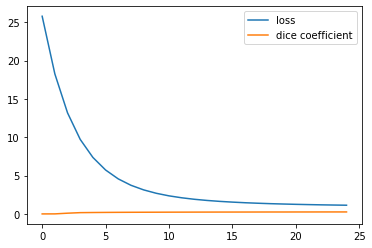

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['dice_coef'])
plt.legend(('loss', 'dice coefficient'))

In [12]:
model.save("cho.hdf5")

In [19]:
y_test = read_images("examples/BBBC030_v1/test_truth",image_suffix="png")

In [15]:
results = predict(test_path="examples/BBBC030_v1/test",model_weights= "cho.hdf5",train_seed = 12,custom_loss = {'dice_coef': dice_coef,
                                               'dice_coef_loss': dice_coef_loss}, target_size = (256, 256))

Found 38 images belonging to 1 classes.
['images/cho23.png', 'images/cho24.png', 'images/cho25.png', 'images/cho26.png', 'images/cho27.png', 'images/cho28.png', 'images/cho29.png', 'images/cho30.png', 'images/cho31.png', 'images/cho32.png', 'images/cho33.png', 'images/cho34.png', 'images/cho35.png', 'images/cho36.png', 'images/cho37.png', 'images/cho38.png', 'images/cho39.png', 'images/cho40.png', 'images/cho41.png', 'images/cho42.png', 'images/cho43.png', 'images/cho44.png', 'images/cho45.png', 'images/cho46.png', 'images/cho47.png', 'images/cho48.png', 'images/cho49.png', 'images/cho50.png', 'images/cho51.png', 'images/cho52.png', 'images/cho53.png', 'images/cho54.png', 'images/cho55.png', 'images/cho56.png', 'images/cho57.png', 'images/cho58.png', 'images/cho59.png', 'images/cho60.png']


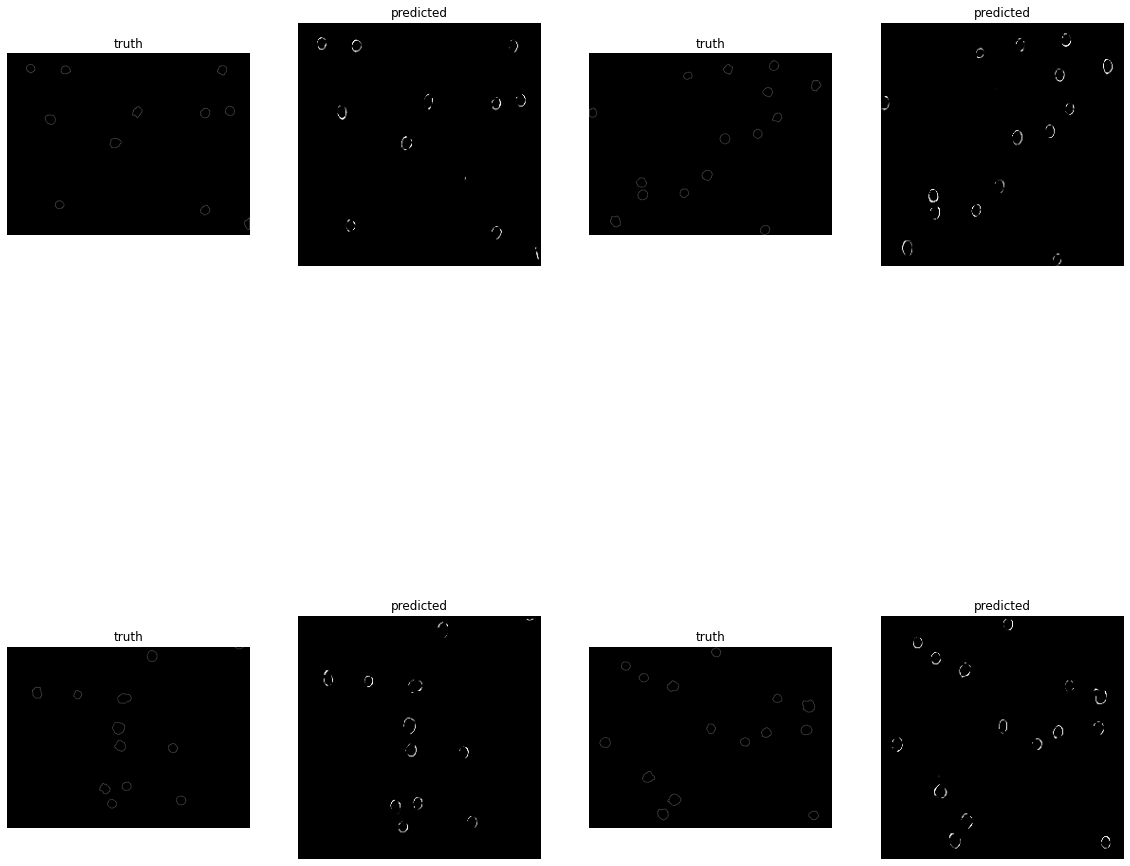

In [22]:
show_images(y_test, results,number = 4, titles=['truth', 'predicted'], figure_size=(20,20))